# Exploratory Data Analysis (EDA) on Animal Shelter Outcomes

This notebook is used for performing exploratory data analysis on the training dataset of animal shelter outcomes. The goal is to understand the distribution of the outcome types and other features.

<h4>Enter your computer's home firectory</h4>

In [1]:
home_dir = r"/Users/wrngnfreeman/Github/Shelter-Animal-Outcomes"

#### Import required modules

In [2]:
import sys
import random

sys.path.append(home_dir + r"/src")
import data_processing, viz

## Load the dataset

In [ ]:
# Load and process the dataset
processed_df = data_processing.process_data(
    home_dir=home_dir,
    data_file=r"Austin_Animal_Center_Outcomes_20250318",
    AnimalID=r"AnimalID",
    dep_var=r"OutcomeType"
)

AnimalID=r"AnimalID"

# Display the few rows of the dataset
processed_df.loc[
    processed_df[AnimalID].isin(random.sample(processed_df[AnimalID].unique().tolist(), 5)),
    :
].drop(columns="BreedType").rename(columns={"Breed_broken": "Breed"})

,AnimalID,OutcomeType,Name,DateTime,AnimalType,AgeuponOutcome,SexuponOutcome,Sterilization,Breed,Mix,CoatColor,CoatPattern
14899,A667284,Euthanasia,NaN,11/23/2013 01:30:00 PM,Dog,<5 years,Male,Intact,Pit Bull,Mix,Black,NaN
42437,A689936,Return_to_owner,Tux,10/15/2014 07:05:00 PM,Cat,<6 months,Male,Sterilized,Domestic Shorthair,Mix,Brown,Tabby
43747,A690913,Transfer,*Bert,11/25/2014 12:50:00 PM,Dog,<5 years,Male,Sterilized,Pit Bull,Mix,Gray,NaN
43748,A690913,Transfer,*Bert,11/25/2014 12:50:00 PM,Dog,<5 years,Male,Sterilized,Pit Bull,Mix,White,NaN
140753,A773854,Adoption,Midnight,06/12/2018 06:13:00 PM,Cat,<6 months,Female,Sterilized,Domestic Shorthair,Mix,Black,NaN
263222,A909814,Adoption,NaN,12/12/2024 12:47:00 PM,Cat,<6 months,Male,Sterilized,Domestic Medium Hair,Pure breed,Brown,Tabby
263223,A909814,Adoption,NaN,12/12/2024 12:47:00 PM,Cat,<6 months,Male,Sterilized,Domestic Medium Hair,Pure breed,White,Tabby


## Visualizations

### Distribution of the dependent variable "OutcomeType"

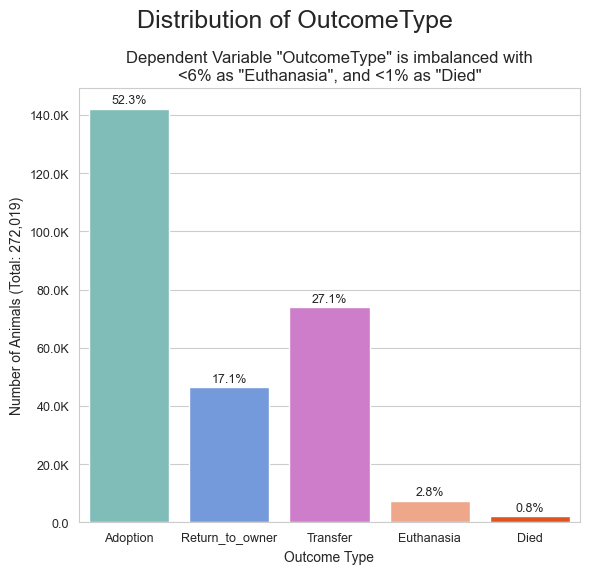

In [4]:
viz.viz_outcometype(home_dir=home_dir, processed_df=processed_df)

### Distribution of AnimalType

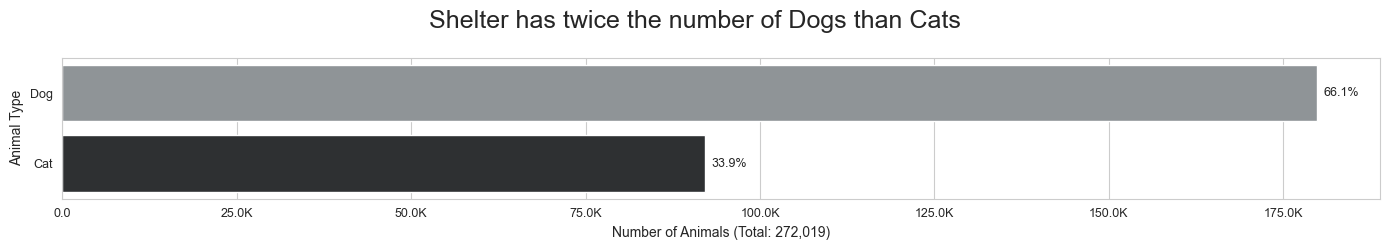

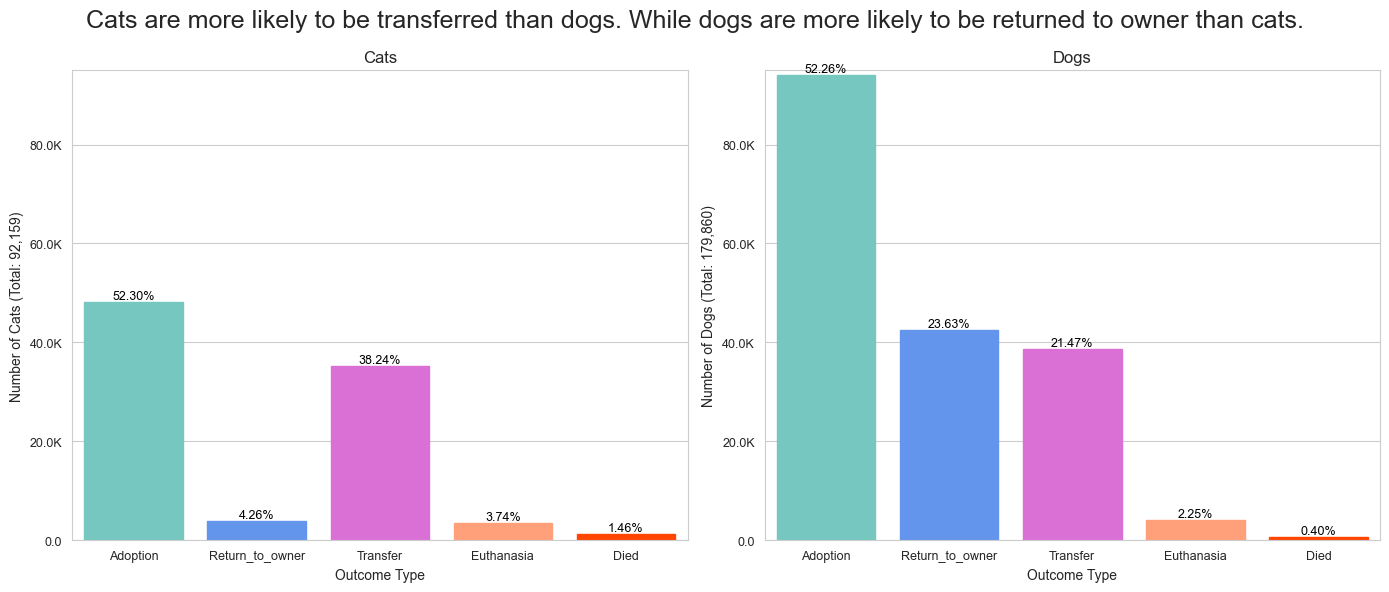

In [5]:
viz.viz_animal_type(home_dir=home_dir, processed_df=processed_df)

### How does Age determine the outcome of an animal?

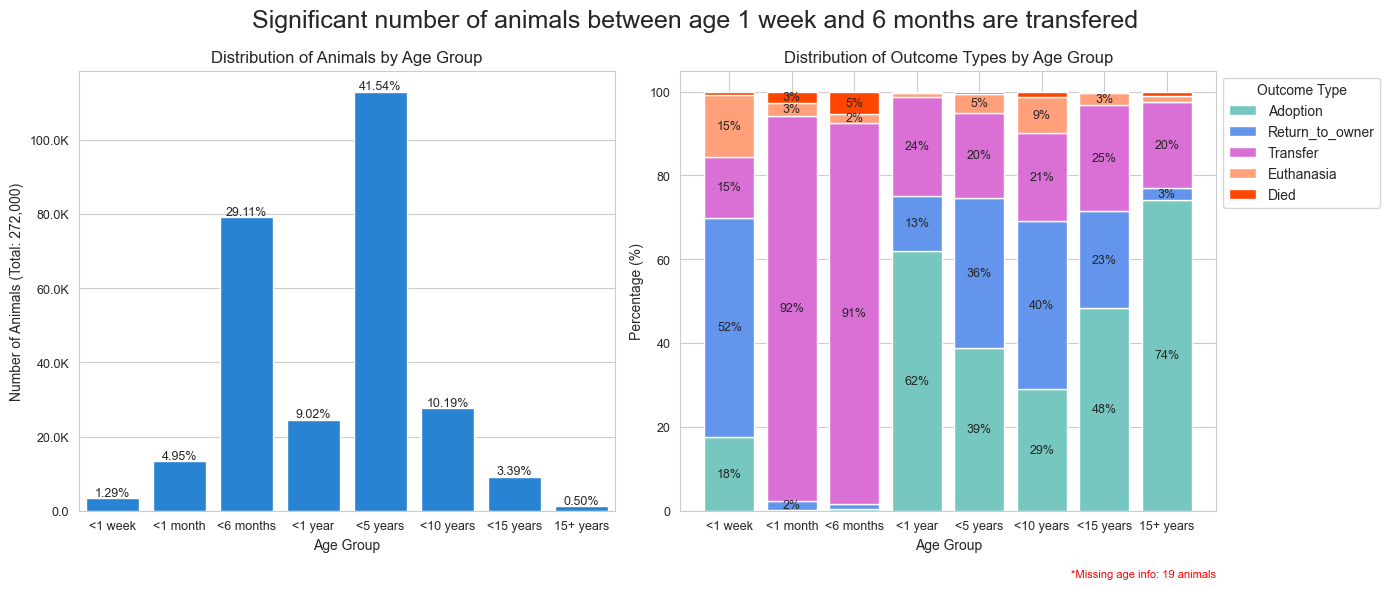

In [6]:
viz.viz_age(home_dir=home_dir, processed_df=processed_df)

### How does sex determine the outcome of an animal?

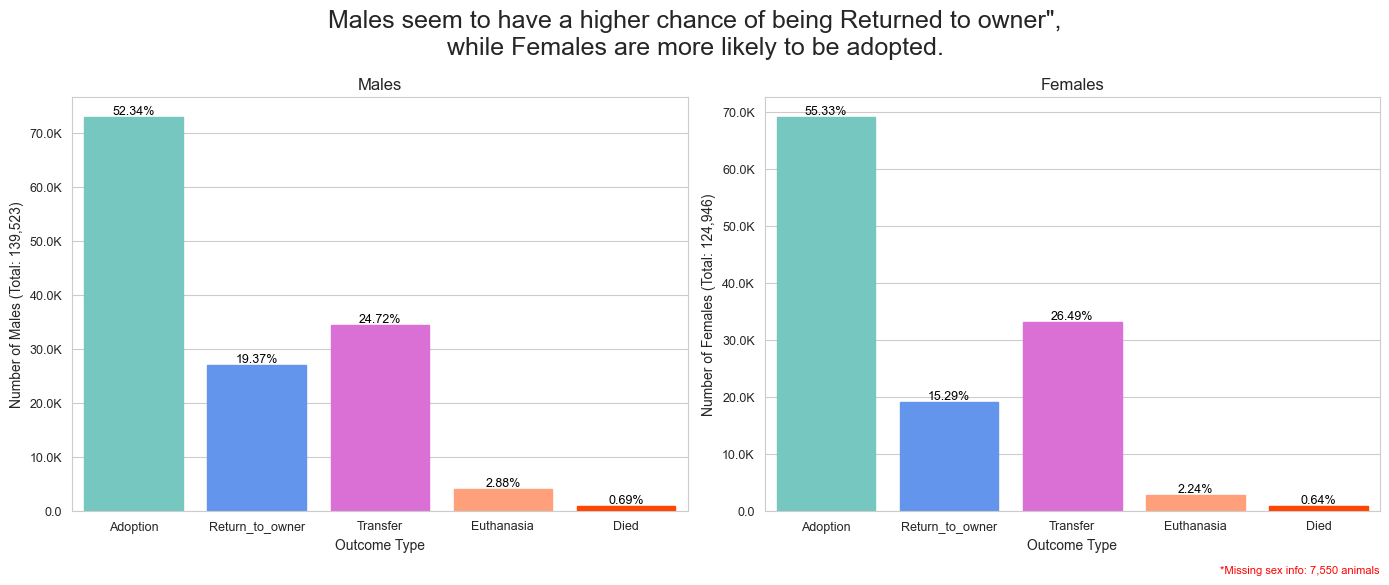

In [7]:
viz.viz_sex(home_dir=home_dir, processed_df=processed_df)

### How does Sterilization determine the outcome of an animal?

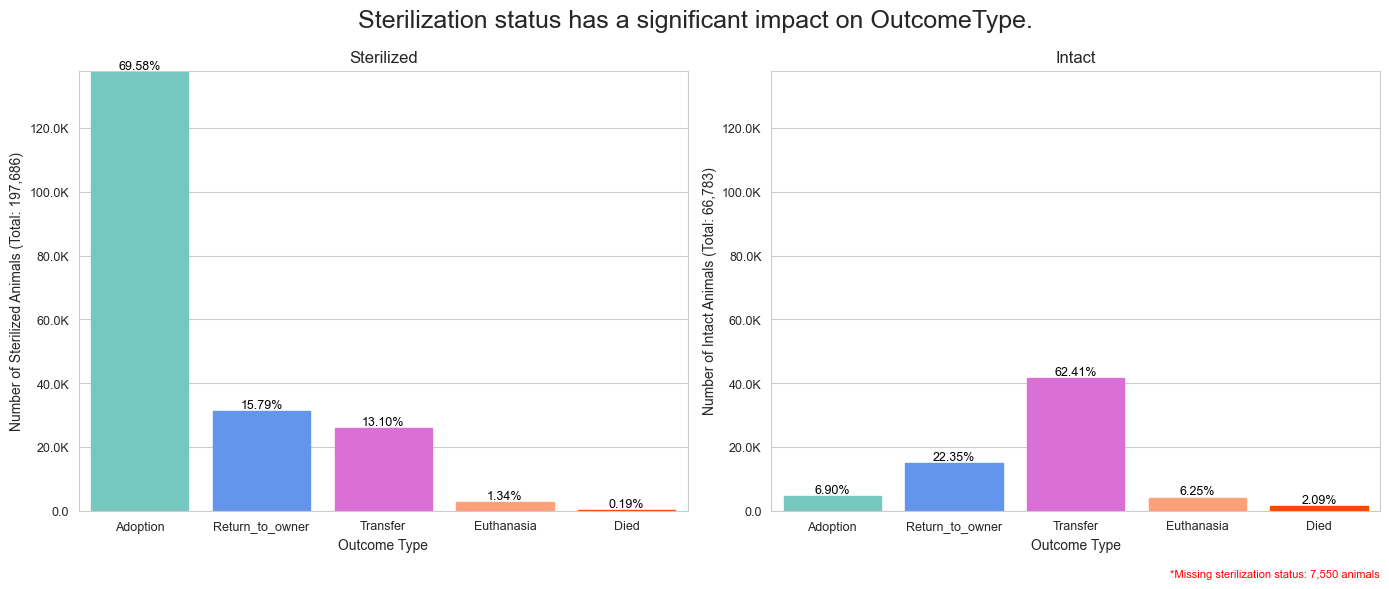

In [8]:
viz.viz_sterilization(home_dir=home_dir, processed_df=processed_df)

### What breeds do we have in the shelter?

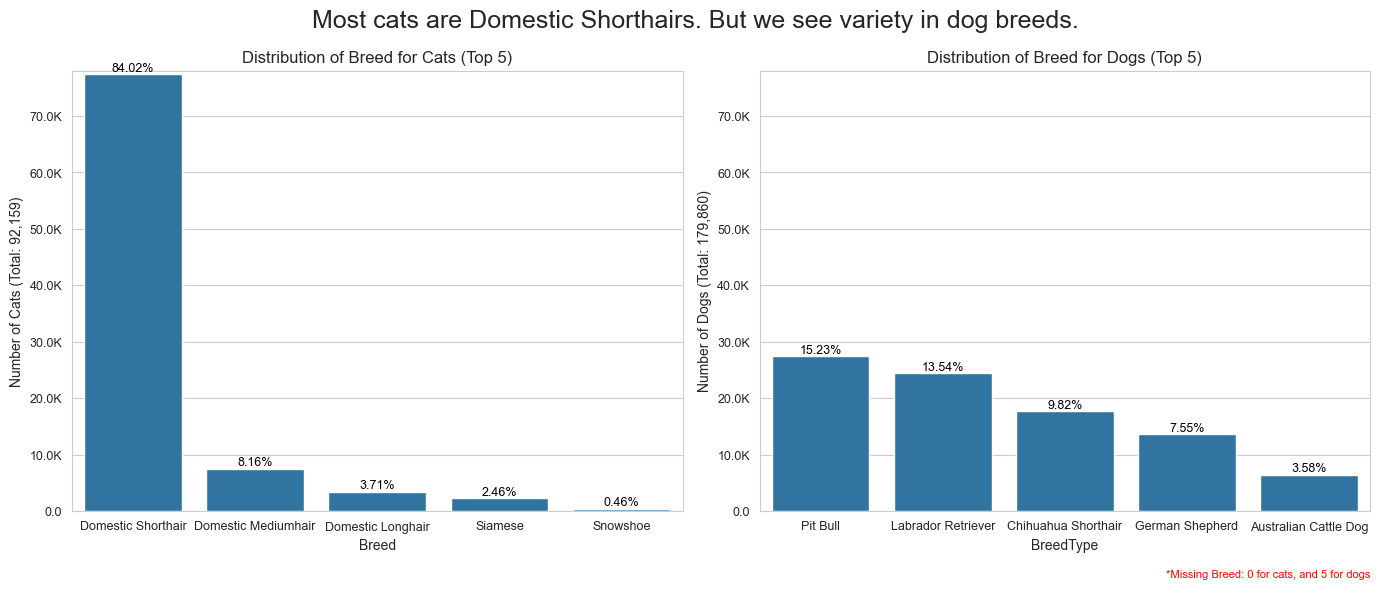

In [9]:
viz.viz_breed(home_dir=home_dir, processed_df=processed_df, top_n=5)

### How does being a pure breed or mixed breed animal determine the outcome of that animal?

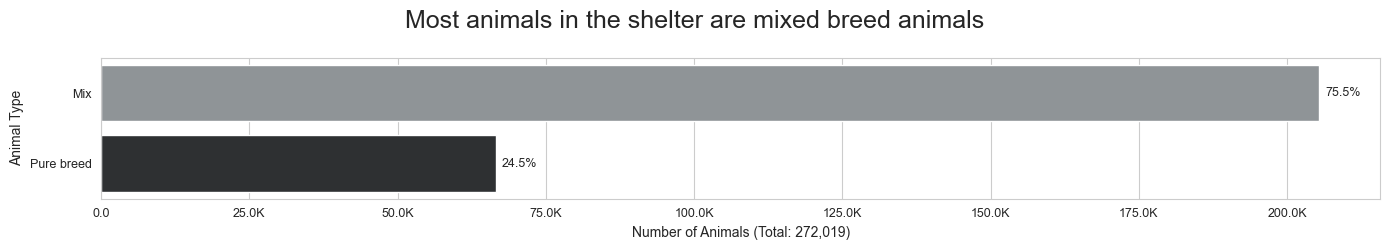

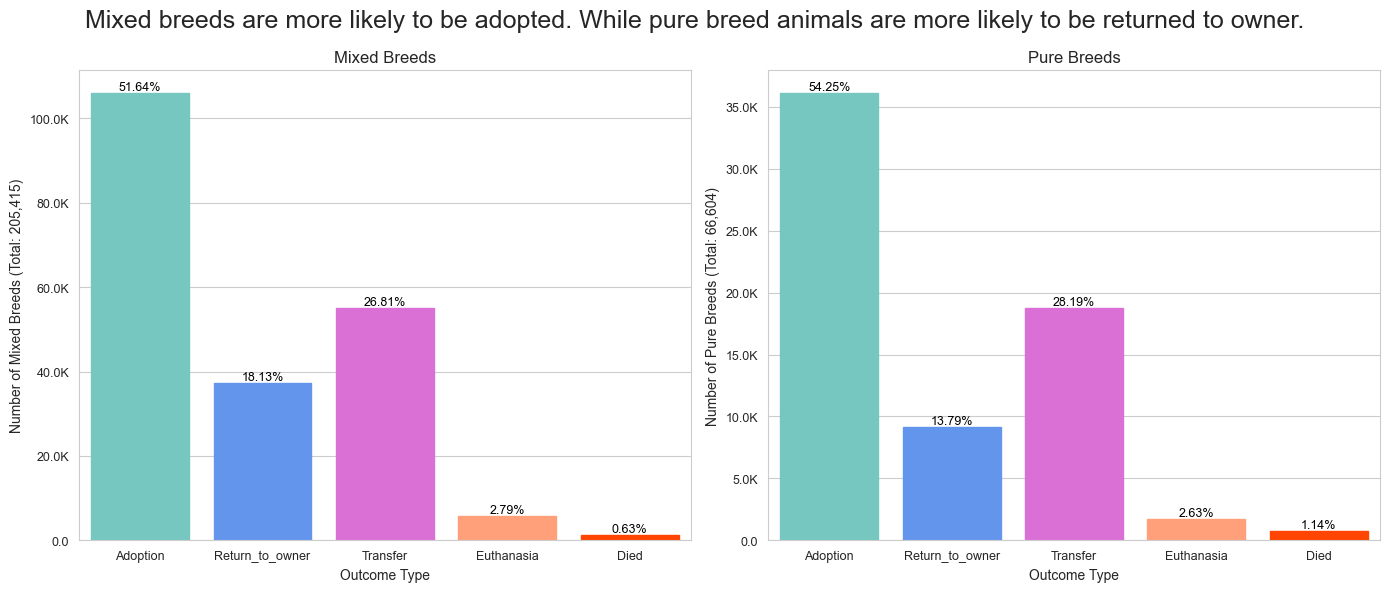

In [10]:
viz.viz_breed_mix(home_dir=home_dir, processed_df=processed_df)

### What colored animals do we have in the shelter?

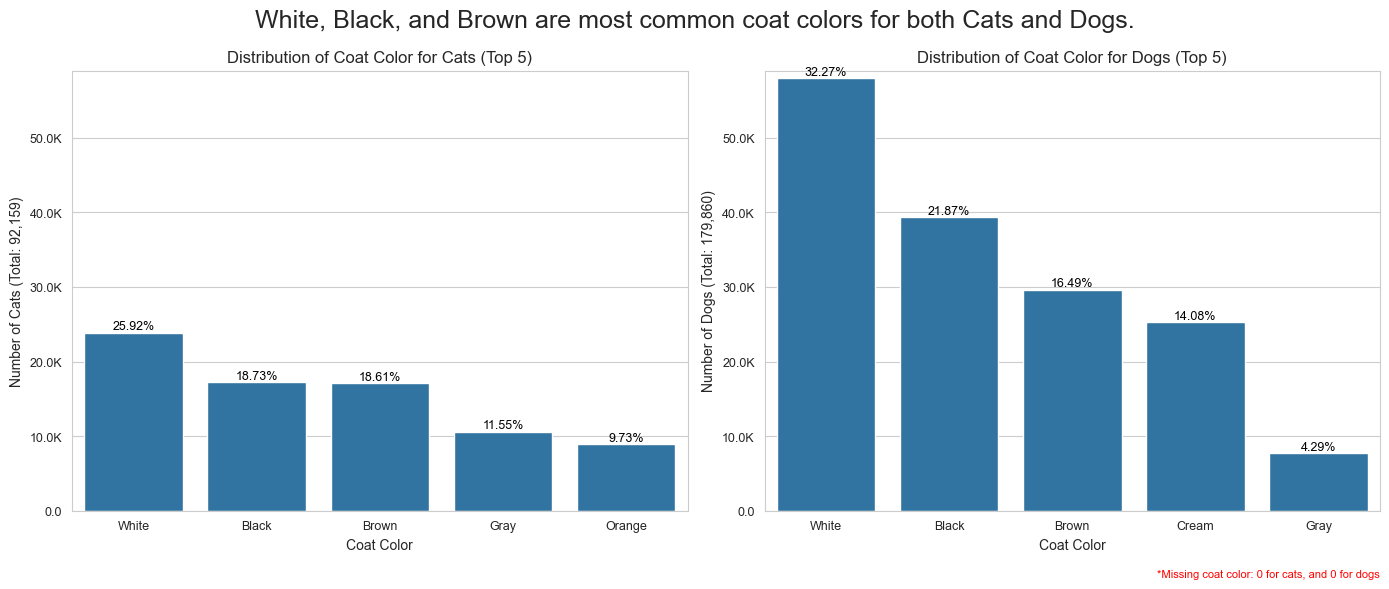

In [11]:
viz.viz_coatcolor(home_dir=home_dir, processed_df=processed_df)

### What coat patterns do the animals have in the shelter?

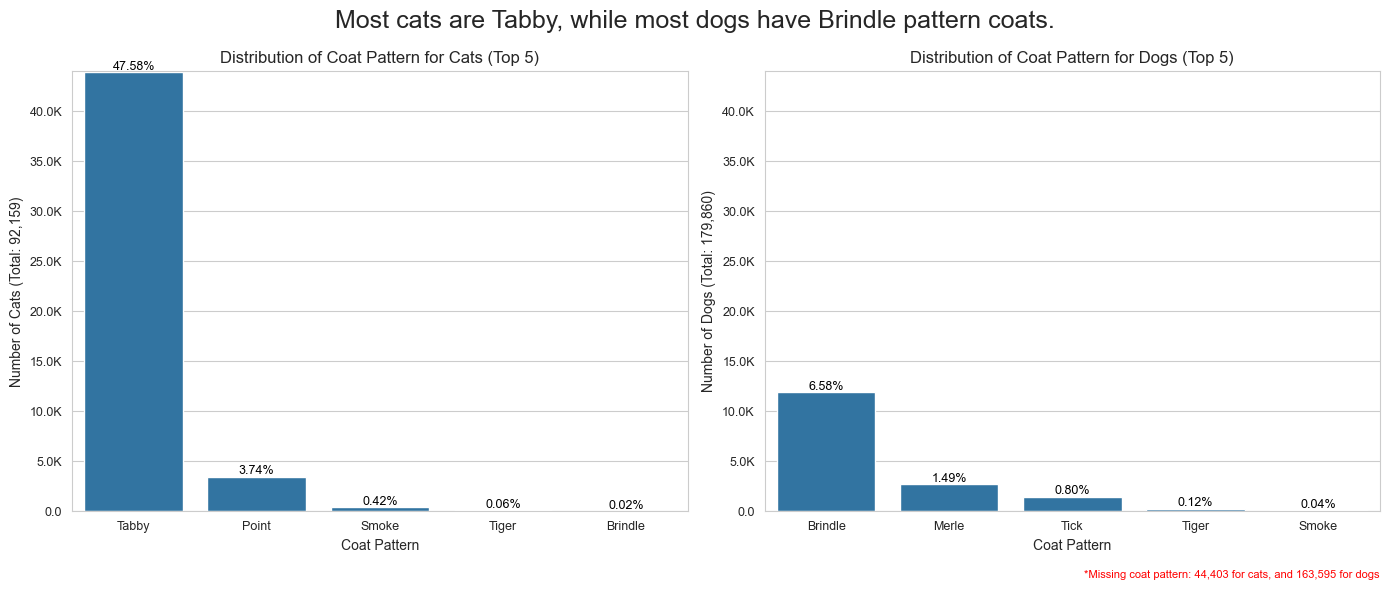

In [12]:
viz.viz_coatpattern(home_dir=home_dir, processed_df=processed_df)

## Conclusion

This exploratory analysis provides insights into the distribution of the dependent variable "OutcomeType", and other factors that effect animal's outcome at the shelter. Results from a machine learning model is expected to be in-line with these findings.

I encourage you to check out my Interactive Tableau Dashboard if you wish to investigate more on this.